# Resumen del Proyecto

Este proyecto tiene como objetivo investigar la relación entre las características de las estrellas anfitrionas y las propiedades de sus exoplanetas mediante análisis exploratorio de datos (EDA) y técnicas avanzadas de aprendizaje automático. El trabajo se basa en datos públicos de exoplanetas provenientes de múltiples fuentes (NASA Exoplanet Archive, Exoplanet.eu), analizando más de 6,000 sistemas planetarios para identificar patrones y relaciones que permitan comprender mejor la formación y evolución de sistemas planetarios.

## Metodología

El enfoque metodológico combina análisis estadísticos descriptivos, visualizaciones exploratorias exhaustivas y técnicas avanzadas de modelamiento supervisado. Para cada pregunta de investigación, se realiza primero un análisis exploratorio de datos que incluye estadísticas descriptivas, visualizaciones con matplotlib y seaborn, y análisis de distribuciones. Posteriormente, se implementan modelos de aprendizaje automático con un pipeline completo de preprocesamiento que incluye: codificación de variables categóricas (LabelEncoder), normalización de características (StandardScaler), manejo de valores faltantes, y división estratificada de datos (80/20 train/test). Se emplean técnicas de validación cruzada estratificada (5 folds) y optimización de hiperparámetros mediante GridSearchCV para garantizar la robustez y generalización de los resultados.

## Preguntas de Investigación

A lo largo de este análisis, abordamos cinco preguntas de investigación fundamentales:

1. **Distribución de Tamaños según Tipo de Estrella**: Investigamos cómo varía el radio medio de los exoplanetas en diferentes tipos estelares, con especial atención a las enanas rojas tipo M y estrellas tipo G similares al Sol. Utilizamos un modelo de Máquinas de Soporte Vectorial (SVC) con kernel RBF para clasificar el tipo espectral estelar basándose en las características planetarias, logrando una precisión del 99% que confirma la existencia de patrones distintivos en la distribución de tamaños planetarios según el tipo de estrella anfitriona.

2. **Relación Masa-Masa (Estrella-Planeta)**: Exploramos y cuantificamos la correlación entre la masa de la estrella y la masa de sus planetas mediante regresión con k-Vecinos Más Cercanos (KNeighborsRegressor). El modelo, entrenado con características como período orbital, radio planetario, masa planetaria y excentricidad, alcanzó un error absoluto medio (MAE) de 0.22 y un coeficiente de determinación (R²) de 0.34, sugiriendo que aunque existe cierta relación, no es lo suficientemente fuerte como para establecer una correlación clara entre la masa estelar y planetaria.

3. **Frecuencia de Planetas Gigantes**: Examinamos la distribución de planetas tipo Júpiter (gigantes gaseosos con radio > 8 R⊕) alrededor de diferentes tipos espectrales de estrellas. Implementamos un clasificador k-NN que predice si un planeta es de tipo Júpiter basándose en características estelares (masa, metalicidad, temperatura efectiva), permitiendo identificar qué tipos de estrellas son más propensas a albergar planetas gigantes gaseosos.

4. **Clasificación de Planetas según Contexto Estelar**: Desarrollamos modelos para clasificar exoplanetas según su composición (rocosa vs gaseosa) utilizando únicamente características de sus estrellas anfitrionas (masa, radio, temperatura efectiva, metalicidad, edad, tipo espectral). Se compararon y optimizaron dos algoritmos: Máquinas de Soporte Vectorial (SVM) con kernel RBF y k-Vecinos Más Cercanos (k-NN), ambos con optimización exhaustiva de hiperparámetros mediante GridSearchCV, evaluando su rendimiento mediante métricas de precisión, recall, F1-score y matrices de confusión.

5. **Descubrimientos de Planetas por Tipo y Año**: Analizamos la evolución temporal de los descubrimientos de exoplanetas según su tipo (rocosos, supertierras, gigantes gaseosos), identificando tendencias y patrones en la detección de diferentes categorías planetarias. Se implementaron y compararon cuatro modelos de clasificación: SVM RBF, Árboles de Decisión, Regresión Logística y k-NN, todos con optimización de hiperparámetros. Los resultados revelaron que las supertierras muestran un aumento significativo desde 2014, con picos excepcionales en 2014 y 2016, mientras que los gigantes gaseosos mantienen una frecuencia más constante, confirmando que el año de descubrimiento contiene información predictiva sobre el tipo de planeta detectado.

## Técnicas y Herramientas

Las técnicas de aprendizaje automático implementadas incluyen: **clasificación supervisada** (SVM con kernel RBF, k-NN, Árboles de Decisión, Regresión Logística) y **regresión** (KNeighborsRegressor). Todas las implementaciones utilizan validación cruzada estratificada, optimización de hiperparámetros mediante búsqueda en cuadrícula (GridSearchCV), y evaluación exhaustiva mediante métricas como accuracy, precision, recall, F1-score (weighted), error absoluto medio (MAE), error cuadrático medio (MSE), coeficiente de determinación (R²) y matrices de confusión. El análisis se realizó utilizando Python con librerías especializadas: pandas para manipulación de datos, scikit-learn para machine learning, matplotlib y seaborn para visualizaciones, y numpy para operaciones numéricas.


# Glosario

1. [Pregunta 1: Distribución de Tamaños según Tipo de Estrella](#pregunta-1-distribución-de-tamaños-según-tipo-de-estrella)
2. [Pregunta 2: Relación Masa-Masa estrella planeta](#pregunta-2-relación-masa-masa-estrella-planeta)
3. [Pregunta 3: Frecuencia de Planetas Gigantes en distintas estrellas](#pregunta-3-frecuencia-de-planetas-gigantes-en-distintas-estrellas)
4. [Pregunta 4: Clasificación de planetas según Contexto Estelar](#pregunta-4-clasificacion-de-planetas-segun-contexto-estelar)
5. [Pregunta 5: Descubrimientos de Planetas por tipo y año](#pregunta-5-descubrimientos-de-planetas-por-tipo-y-año)



## Análisis Exploratorio de Datos: Exoplanetas y Estrellas Anfitrionas
Este cuaderno reproduce el Análisis Exploratorio de Datos (EDA) realizado sobre el conjunto de datos de exoplanetas extraído de bases de datos públicas. El objetivo es investigar cómo las propiedades de las estrellas influyen en las de sus exoplanetas.

## Análisis Detallado: Respuestas a Preguntas Específicas

Responderemos a 5 preguntas de investigación sobre la relación entre las características estelares y planetarias.


### Librerías

In [124]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Preprocesamiento
from sklearn.preprocessing import LabelEncoder, StandardScaler

# División de datos y validación cruzada
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV

# Modelos de clasificación
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Métricas de evaluación
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    mean_absolute_error,
    mean_squared_error,
    r2_score
)


## Pregunta 1: Distribución de Tamaños según Tipo de Estrella
¿Cómo varía el radio medio de los exoplanetas en sistemas de enanas rojas tipo M en comparación con sistemas de estrellas tipo G (similares al Sol) u otros tipos estelares?

In [125]:
ruta = os.path.join("Data", "PSCompPars_2025.10.17_15.58.36.csv")
archivo1 = pd.read_csv(ruta, on_bad_lines="skip", skiprows=88)
archivo1
tipom = archivo1[archivo1["st_spectype"].str[0]=="M"]
tipog = archivo1[archivo1["st_spectype"].str[0]=="G"]
otros = archivo1[(archivo1["st_spectype"].str[0]!="G") & (archivo1["st_spectype"].str[0]!="M")]
archivo1.columns

Index(['pl_name', 'hostname', 'sy_snum', 'sy_pnum', 'discoverymethod',
       'disc_year', 'disc_facility', 'pl_controv_flag', 'pl_orbper',
       'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax',
       'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_rade',
       'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1',
       'pl_radjerr2', 'pl_radjlim', 'pl_bmasse', 'pl_bmasseerr1',
       'pl_bmasseerr2', 'pl_bmasselim', 'pl_bmassj', 'pl_bmassjerr1',
       'pl_bmassjerr2', 'pl_bmassjlim', 'pl_bmassprov', 'pl_orbeccen',
       'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim', 'pl_insol',
       'pl_insolerr1', 'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1',
       'pl_eqterr2', 'pl_eqtlim', 'ttv_flag', 'st_spectype', 'st_teff',
       'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1',
       'st_raderr2', 'st_radlim', 'st_mass', 'st_masserr1', 'st_masserr2',
       'st_masslim', 'st_met', 'st_meterr1', 'st_meterr2', 

In [126]:
tipom["st_spectype"] = 0
tipog["st_spectype"] = 1
otros["st_spectype"] = 2

C:\Users\edgar\AppData\Local\Temp\ipykernel_28784\710564443.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tipom["st_spectype"] = 0
C:\Users\edgar\AppData\Local\Temp\ipykernel_28784\710564443.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tipog["st_spectype"] = 1
C:\Users\edgar\AppData\Local\Temp\ipykernel_28784\710564443.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [127]:
tipom["discoverymethod"].value_counts()

discoverymethod
Transit                      285
Radial Velocity              175
Imaging                       24
Microlensing                  11
Transit Timing Variations      4
Astrometry                     1
Eclipse Timing Variations      1
Name: count, dtype: int64

In [128]:
tipog["discoverymethod"].value_counts()

discoverymethod
Radial Velocity              432
Transit                      320
Microlensing                   6
Transit Timing Variations      5
Imaging                        4
Name: count, dtype: int64

In [129]:
otros["discoverymethod"].value_counts()

discoverymethod
Transit                          3854
Radial Velocity                   539
Microlensing                      238
Imaging                            59
Transit Timing Variations          30
Eclipse Timing Variations          16
Orbital Brightness Modulation       9
Pulsar Timing                       8
Astrometry                          4
Pulsation Timing Variations         2
Disk Kinematics                     1
Name: count, dtype: int64

In [130]:
tipom["pl_rade"].describe()

count    499.000000
mean       3.986597
std        4.261937
min        0.566000
25%        1.454000
50%        2.200000
75%        3.735000
max       30.264300
Name: pl_rade, dtype: float64

In [131]:
tipog["pl_rade"].describe()

count    763.000000
mean       9.504825
std        4.942647
min        0.400000
25%        3.875000
50%       12.300000
75%       13.500000
max       20.848740
Name: pl_rade, dtype: float64

In [132]:
otros["pl_rade"].describe()

count    4742.000000
mean        5.406988
std         5.257079
min         0.309800
25%         1.750000
50%         2.680000
75%        10.123206
max        77.342100
Name: pl_rade, dtype: float64

hacemos una comparación grafica respecto a la pregunta, la cual nos dice que los planetas de tipo m, suelen tener menor radio a comparacion de los demas, y es más notorio si lo comparamos con los de tipo g

<BarContainer object of 3 artists>

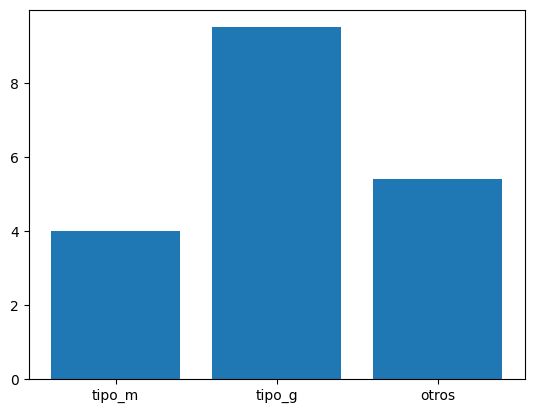

In [133]:
plt.bar(["tipo_m", "tipo_g", "otros"],[tipom["pl_rade"].mean(), tipog["pl_rade"].mean(), otros["pl_rade"].mean()])

Visualizamos individualmente los graficos para ver si los datos son representativos

<Axes: xlabel='pl_rade', ylabel='Count'>

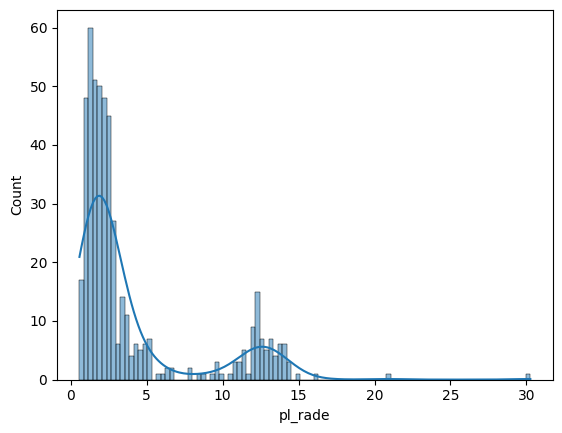

In [134]:
sns.histplot(data=tipom["pl_rade"], kde=True, bins=100)

<Axes: xlabel='pl_rade', ylabel='Count'>

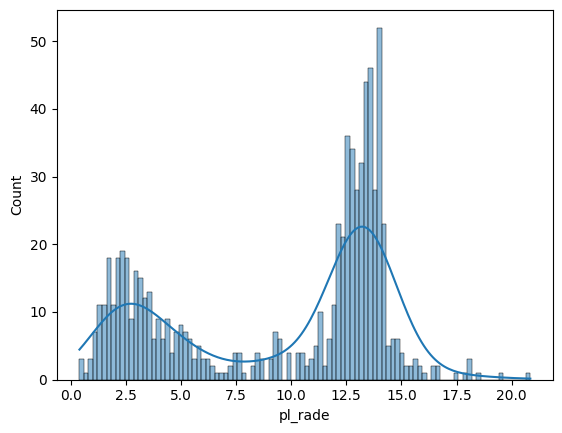

In [135]:
sns.histplot(data=tipog["pl_rade"], kde=True, bins=100)

<Axes: xlabel='pl_rade', ylabel='Count'>

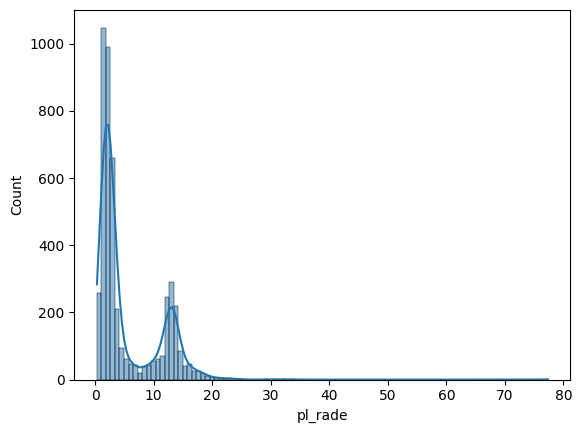

In [136]:
sns.histplot(data=otros["pl_rade"], kde=True, bins=100)

los datos entre los 3 tipos espectrales, suelen tener una tendencia, por lo que nos da indicios sobre la pregunta inicial

Parte de machine learning

In [137]:
data_train = archivo1.copy()

In [138]:
data_train.info()
#vemos los tipos de datos para poder separarlos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6028 entries, 0 to 6027
Data columns (total 84 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pl_name          6028 non-null   object 
 1   hostname         6028 non-null   object 
 2   sy_snum          6028 non-null   int64  
 3   sy_pnum          6028 non-null   int64  
 4   discoverymethod  6028 non-null   object 
 5   disc_year        6028 non-null   int64  
 6   disc_facility    6028 non-null   object 
 7   pl_controv_flag  6028 non-null   int64  
 8   pl_orbper        5720 non-null   float64
 9   pl_orbpererr1    5229 non-null   float64
 10  pl_orbpererr2    5229 non-null   float64
 11  pl_orbperlim     5720 non-null   float64
 12  pl_orbsmax       5726 non-null   float64
 13  pl_orbsmaxerr1   3784 non-null   float64
 14  pl_orbsmaxerr2   3784 non-null   float64
 15  pl_orbsmaxlim    5727 non-null   float64
 16  pl_rade          6004 non-null   float64
 17  pl_radeerr1   

In [139]:
data_train.select_dtypes(include=["object"])
#obtenemos datos categoricos, para poder codificar los datos categoricos que nos interesen

,pl_name,hostname,discoverymethod,disc_facility,pl_bmassprov,st_spectype,st_metratio,rastr,decstr
0,11 Com b,11 Com,Radial Velocity,Xinglong Station,Msini,G8 III,[Fe/H],12h20m42.91s,+17d47m35.71s
1,11 UMi b,11 UMi,Radial Velocity,Thueringer Landessternwarte Tautenburg,Msini,K4 III,[Fe/H],15h17m05.90s,+71d49m26.19s
2,14 And b,14 And,Radial Velocity,Okayama Astrophysical Observatory,Msini,K0 III,[Fe/H],23h31m17.80s,+39d14m09.01s
3,14 Her b,14 Her,Radial Velocity,W. M. Keck Observatory,Mass,K0V,[Fe/H],16h10m24.50s,+43d48m58.90s
4,16 Cyg B b,16 Cyg B,Radial Velocity,Multiple Observatories,Msini,G3 V,[Fe/H],19h41m51.75s,+50d31m00.57s
...,...,...,...,...,...,...,...,...,...
6023,ups And b,ups And,Radial Velocity,Lick Observatory,Msini,F8 V,[M/H],01h36m47.60s,+41d24m13.73s
6024,ups And c,ups And,Radial Velocity,Multiple Observatories,Mass,F8 V,[M/H],01h36m47.60s,+41d24m13.73s
6025,ups And d,ups And,Radial Velocity,Multiple Observatories,Mass,F8 V,[M/H],01h36m47.60s,+41d24m13.73s
6026,ups Leo b,ups Leo,Radial Velocity,Okayama Astrophysical Observatory,Msini,G9 III,[Fe/H],11h36m56.93s,-00d49m24.83s


In [140]:
le = LabelEncoder()
data_train["discoverymethod"] = le.fit_transform(data_train["discoverymethod"])
data_train["disc_facility"] = le.fit_transform(data_train["disc_facility"])
data_train["pl_bmassprov"] = le.fit_transform(data_train["pl_bmassprov"])
data_train["st_metratio"] = le.fit_transform(data_train["st_metratio"])

In [141]:
data_train.select_dtypes(include=["object"])

,pl_name,hostname,st_spectype,rastr,decstr
0,11 Com b,11 Com,G8 III,12h20m42.91s,+17d47m35.71s
1,11 UMi b,11 UMi,K4 III,15h17m05.90s,+71d49m26.19s
2,14 And b,14 And,K0 III,23h31m17.80s,+39d14m09.01s
3,14 Her b,14 Her,K0V,16h10m24.50s,+43d48m58.90s
4,16 Cyg B b,16 Cyg B,G3 V,19h41m51.75s,+50d31m00.57s
...,...,...,...,...,...
6023,ups And b,ups And,F8 V,01h36m47.60s,+41d24m13.73s
6024,ups And c,ups And,F8 V,01h36m47.60s,+41d24m13.73s
6025,ups And d,ups And,F8 V,01h36m47.60s,+41d24m13.73s
6026,ups Leo b,ups Leo,G9 III,11h36m56.93s,-00d49m24.83s


In [142]:
data_train.loc[data_train["st_spectype"].str[0] == "M", "st_spectype"] = 0
data_train.loc[data_train["st_spectype"].str[0] == "G", "st_spectype"] = 1
data_train.loc[(data_train["st_spectype"] != 1) & (data_train["st_spectype"] != 0), "st_spectype"] = 2
#transformamos los datos dependientes, los cuales son categoricos, para poder integrarlos para entrenar

In [143]:
data_train["st_spectype"].value_counts()

st_spectype
2    4760
1     767
0     501
Name: count, dtype: int64

In [144]:
data_train["st_spectype"] = data_train["st_spectype"].astype(int)

In [145]:
data_train.select_dtypes(include=["object"])

,pl_name,hostname,rastr,decstr
0,11 Com b,11 Com,12h20m42.91s,+17d47m35.71s
1,11 UMi b,11 UMi,15h17m05.90s,+71d49m26.19s
2,14 And b,14 And,23h31m17.80s,+39d14m09.01s
3,14 Her b,14 Her,16h10m24.50s,+43d48m58.90s
4,16 Cyg B b,16 Cyg B,19h41m51.75s,+50d31m00.57s
...,...,...,...,...
6023,ups And b,ups And,01h36m47.60s,+41d24m13.73s
6024,ups And c,ups And,01h36m47.60s,+41d24m13.73s
6025,ups And d,ups And,01h36m47.60s,+41d24m13.73s
6026,ups Leo b,ups Leo,11h36m56.93s,-00d49m24.83s


              precision    recall  f1-score   support

           0       1.00      0.97      0.98       155
           1       1.00      0.93      0.96       209
           2       0.99      1.00      0.99      1445

    accuracy                           0.99      1809
   macro avg       1.00      0.97      0.98      1809
weighted avg       0.99      0.99      0.99      1809



<Axes: >

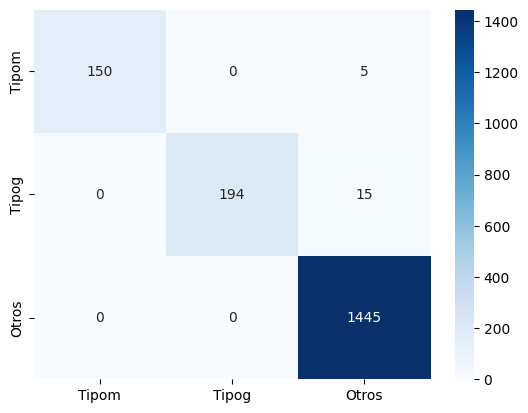

In [146]:
#utilizamos el modelo SVC, para poder entrenar datos categoricos
from sklearn.model_selection import train_test_split
X = data_train.drop(columns={"pl_name", "rastr", "hostname", "decstr"})
y = data_train["st_spectype"]
X = X.fillna(X.median())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

escalar = StandardScaler()
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)
from sklearn.svm import SVC

modelo = SVC(kernel="rbf")
modelo.fit(X_train, y_train)
modelo.score(X_test, y_test)

prediccion = modelo.predict(X_test)
print(classification_report(y_test, prediccion))
matriz = confusion_matrix(y_test, prediccion)
sns.heatmap(matriz, annot=True, xticklabels=["Tipom", "Tipog", "Otros"], yticklabels=["Tipom", "Tipog", "Otros"], fmt="d", cmap="Blues")


finalmente, podemos concluir, que si existe una correlacion de los datos, según como se clasifican los planetas, compronbandolo a traves de un modelo SVC, el cual nos da una precisión casi perfecta de 99%, por lo que nos da seguridad de que el modelo interpreta los datos de forma correcta, ademas que los datos de classification_report, tambien son precisos, por lo que nos indica que no hay datos que no coincidan con la pregunta inicial.

### Pregunta 2: Relación Masa-Masa (Estrella-Planeta)

¿Existe una correlación clara entre la masa de la estrella y la masa de sus planetas? Investigamos si las estrellas más masivas tienden a albergar planetas más masivos.


In [147]:
archivo = os.path.join('Data', 'datosdaniel.csv')

df = pd.read_csv(archivo, on_bad_lines='skip', skiprows=70)

In [148]:
eliminar = ['pl_controv_flag', 'pl_orbper', 'pl_orbpererr1',
       'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1',
       'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_radeerr1',
       'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1', 'pl_radjerr2',
       'pl_radjlim','pl_bmasseerr1', 'pl_bmasseerr2',
       'pl_bmasselim','pl_bmassjerr1', 'pl_bmassjerr2',
       'pl_bmassjlim', 'pl_bmassprov', 'pl_orbeccen', 'pl_orbeccenerr1',
       'pl_orbeccenerr2', 'pl_orbeccenlim', 'pl_insol', 'pl_insolerr1',
       'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1', 'pl_eqterr2',
       'pl_eqtlim','st_tefferr1', 'st_tefferr2',
       'st_tefflim','st_raderr1', 'st_raderr2', 'st_radlim', 'st_masserr1', 'st_masserr2', 'st_masslim', 'st_met',
       'st_meterr1', 'st_meterr2', 'st_metlim', 'st_metratio', 'st_logg',
       'st_loggerr1', 'st_loggerr2', 'st_logglim']
df.drop(eliminar, axis=1, inplace=True)

# Se eliminaran la mayoria de columnas, dejando lo esencial y de ser necesaria mas informacion, se volvera hacia atras manteniendo
# La informacion recolectada hasta el momento

In [149]:
masa = pd.concat([df['pl_bmasse'], df['pl_bmassj'], df['st_mass']], axis=1, ignore_index=False)
masa
# Concadenamos las columnas que nos interesan

,pl_bmasse,pl_bmassj,st_mass
0,4914.898486,15.4640,2.09
1,4684.814200,14.7400,2.78
2,1131.151301,3.5590,1.78
3,2559.472162,8.0530,0.91
4,565.737400,1.7800,1.08
...,...,...,...
6023,218.531000,0.6876,1.30
6024,4443.241130,13.9800,1.30
6025,3257.741172,10.2500,1.30
6026,162.092488,0.5100,1.48


<Axes: xlabel='pl_bmasse', ylabel='st_mass'>

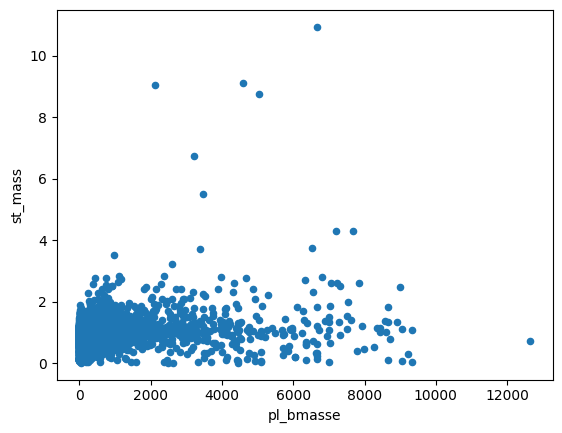

In [150]:
masa.plot(x='pl_bmasse', y='st_mass', kind='scatter')
# Grafico con datos crudos

In [151]:
# Ahora analizaremos mas profundamente, indagando en los planetas de mayor y menor tamaño
masa['st_mass'].describe()

msolar_1 = masa[masa['st_mass'] <= 2.0]
msolar_2 = masa[(masa['st_mass'] >= 2.0) & (masa['st_mass'] <= 4.0)]
msolar_3 = masa[masa['st_mass'] >= 4.0]

msolar_1['st_mass'].describe()  # Dos masas solares
msolar_2['st_mass'].describe()  # Entre dos y cuatro masas solares
msolar_3['st_mass'].describe()  # Mayor a cuatro masas solares

count     8.000000
mean      7.336250
std       2.486339
min       4.300000
25%       5.200000
50%       7.745000
75%       9.070000
max      10.940000
Name: st_mass, dtype: float64

<Axes: xlabel='pl_bmasse', ylabel='st_mass'>

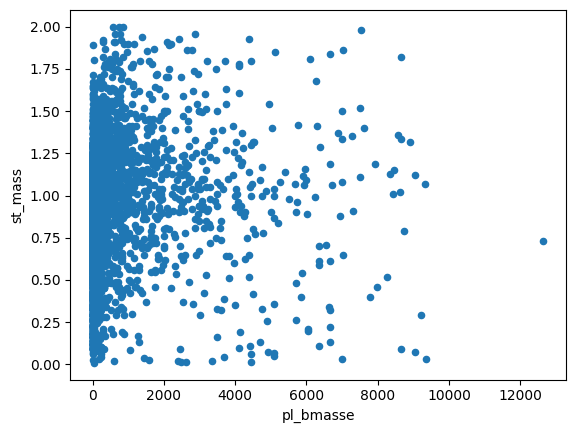

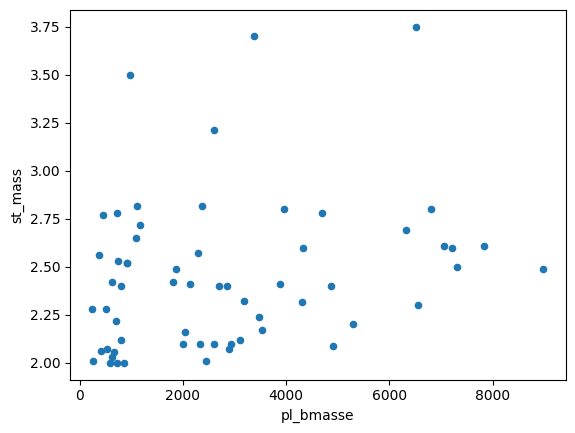

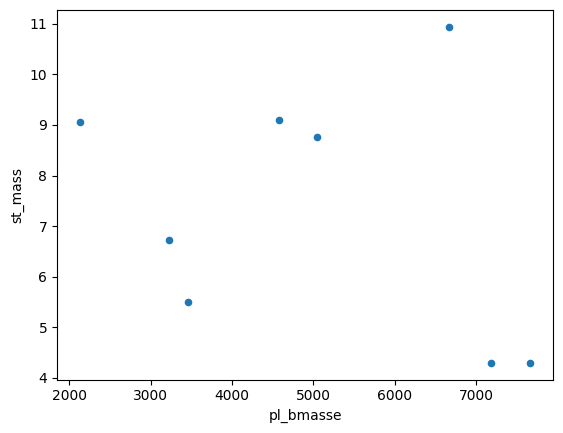

In [152]:
msolar_1.plot(x='pl_bmasse', y='st_mass', kind='scatter')
msolar_2.plot(x='pl_bmasse', y='st_mass', kind='scatter')
msolar_3.plot(x='pl_bmasse', y='st_mass', kind='scatter')

### Analisis de machine learning con regresion

In [153]:
import os
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score

archivo = os.path.join('Data', 'datosdaniel.csv')

df = pd.read_csv(archivo, on_bad_lines='skip', skiprows=70)

#  Definimos el rango de planetas que nos interesa estudiar
rango1 = 0
rango2 = 2
data_estudio = df[(df['st_mass'] >= rango1 ) & (df['st_mass'] <= rango2)]
data_estudio['st_mass'].describe()

count    5955.000000
mean        0.918236
std         0.304273
min         0.009400
25%         0.770500
50%         0.940000
75%         1.080000
max         2.000000
Name: st_mass, dtype: float64

In [154]:
# Que datos usaremos?
datos = df[['pl_orbper', 'pl_rade', 'pl_bmasse', 'pl_orbeccen', 'st_spectype', 'pl_eqt', 'st_mass']]
# Periodo orbital, radio del planeta (comparado a la tierra), masa del planeta (comparado a la tierra), 
# Excentricidad, tipo expectral
datos_limpios = datos.dropna().reset_index(drop=True)

x = datos_limpios[['pl_orbper', 'pl_rade', 'pl_bmasse', 'pl_orbeccen']]
y = datos_limpios['st_mass']   # Datos a predecir

In [155]:
# Normalizamos
scaler = StandardScaler()
X = scaler.fit_transform(x)    

In [156]:
# Entrenamientos
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=132)


knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train, y_train)          

datos_limpios['Prediccion'] = knn.predict(X)

datos_limpios

,pl_orbper,pl_rade,pl_bmasse,pl_orbeccen,st_spectype,pl_eqt,st_mass,Prediccion
0,14.651600,13.900000,263.978500,0.00000,G8V,700.0,0.905,1.027600
1,0.736547,1.875000,7.990000,0.05000,G8V,1958.0,0.905,0.721000
2,8030.000000,13.100000,1017.050902,0.24000,F8 V,1400.0,1.200,1.250000
3,8.463080,3.956770,20.120000,0.00577,M1,600.0,0.510,1.037600
4,18.859690,2.522021,9.600000,0.00338,M1,459.0,0.510,0.749400
...,...,...,...,...,...,...,...,...
1033,1192.779510,12.500000,3222.462219,0.31400,A5V,1250.0,1.795,1.153800
1034,16510.000000,12.700000,2005.497248,0.40000,K5 V,275.0,0.760,1.036800
1035,6.267840,2.018900,3.630000,0.00000,G0 V,1169.8,1.070,0.988801
1036,39.843800,13.700000,347.386449,0.03800,G0 V,614.0,0.950,0.881000


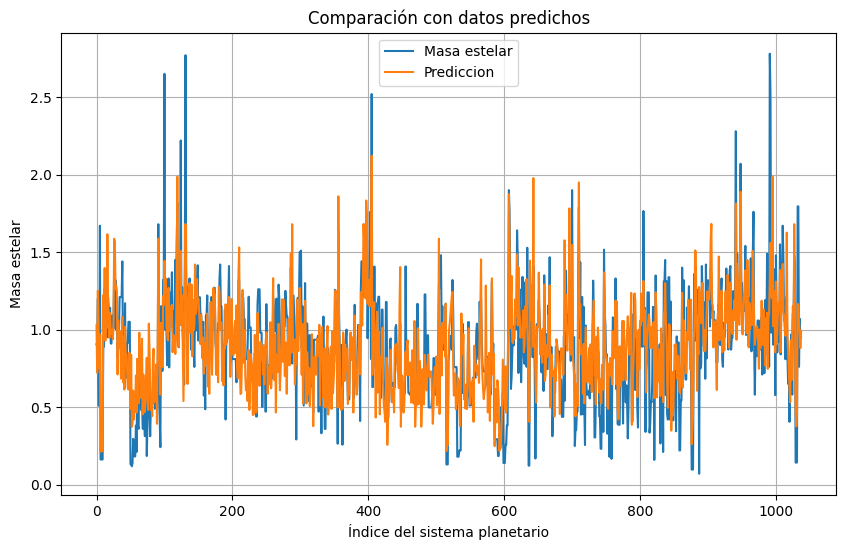

In [157]:
# Grafico de comparacion
plt.figure(figsize=(10,6))

plt.plot(datos_limpios["st_mass"].values, label="Masa estelar")
plt.plot(datos_limpios["Prediccion"].values, label="Prediccion")

plt.title("Comparación con datos predichos")
plt.xlabel("Índice del sistema planetario")
plt.ylabel("Masa estelar")
plt.legend()
plt.grid(True)

plt.show()

In [158]:
# Metricas finales
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

prediccion = knn.predict(x_test)

mae = mean_absolute_error(y_test, prediccion)   # Es el promedio del error en valor absoluto
mse = mean_squared_error(y_test, prediccion)    # Eleva al cuadrado el error antes de promediar
r2 = r2_score(y_test, prediccion)               # Mide qué porcentaje de la variabilidad real explicas


mae # 0.22

r2  # 0.34

0.3434024223895247

### Conclusiones finales

Primero cargamos un nuevo dataframe, donde limpiamos los datos outliers, manteniendo donde se concentra la mayoria de planetas. 
Usaremos los siguientes datos, periodo orbital, radio del planeta (comparado a la tierra), masa del planeta (comparado a la tierra), excentricidad y tipo expectral.
Luego limpiamos los datos eliminando todos los nulos, de ahi sacamos los datos ya menciones, y la masa solar como nuestra variable Y, o sea el dato a predecir. 
 
Finalmente imprimimos un grafico comparando nuestros resultados con el dato a predecir, y vemos que hay varias predicciones validas.

Imprimimos las metricas MAE y R2. donde el mae representa el porcentaje de error, y el r2 que tan bien esta la estructura del modelo, o la relacion entre los datos. La conclusion que obtuve en base a esto, el grafico de la prediccion y el grafico del EDA, es que no existe una relacion entre la masa de un planeta y su estrella, pues este modelo no tiene un verdadero patron en sus datos, lo unico que logramos fue un bajo error puesto que la mayoria de planetas poseian caracteristicas similares, lo que los asemejaba a su estrella, pero esto no representaba una relacion real entre estrellas y sus planetas

### Pregunta 3: Frecuencia de Planetas Gigantes en Distintas Estrellas

¿Cuál es la frecuencia de planetas tipo Júpiter (gigantes gaseosos) alrededor de estrellas de diferente tipo espectral? Comparamos la proporción entre enanas rojas tipo M y estrellas tipo solar.


In [159]:
ruta = os.path.join("Data","pscomppars.csv")
df = pd.read_csv(ruta, skiprows=88)
df.head(3)

,pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,pl_controv_flag,pl_orbper,pl_orbpererr1,...,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
0,11 Com b,11 Com,2,1,Radial Velocity,2007,Xinglong Station,0,323.21000,0.06,...,-1.9238,4.72307,0.023,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848
1,11 UMi b,11 UMi,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,0,516.21997,3.20,...,-1.9765,5.01300,0.005,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903
2,14 And b,14 And,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,0,186.76000,0.11,...,-0.7140,5.23133,0.023,-0.023,2.331,0.240,-0.240,4.91781,0.002826,-0.002826


In [160]:
df.describe()

,sy_snum,sy_pnum,disc_year,pl_controv_flag,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,...,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
count,6028.00000,6028.000000,6028.000000,6028.000000,5.720000e+03,5.229000e+03,5.229000e+03,5720.000000,5726.000000,3784.000000,...,5895.000000,5757.000000,5749.000000,5743.000000,5766.000000,5729.000000,5717.000000,5710.000000,5709.000000,5709.000000
mean,1.10418,1.768414,2016.815362,0.005972,7.481418e+04,9.154382e+04,-2.090947e+04,-0.001049,15.659613,1.831335,...,-63.554841,12.567574,0.098826,-0.100362,10.412454,0.043491,-0.043513,12.277878,0.000639,-0.000639
std,0.34481,1.151874,4.871597,0.077055,5.317788e+06,6.499948e+06,1.384963e+06,0.032373,352.105562,84.819243,...,268.313335,3.064943,0.136510,0.203252,2.998351,0.287448,0.292825,2.963957,0.001788,0.001788
min,1.00000,1.000000,1992.000000,0.000000,9.070629e-02,0.000000e+00,-1.000000e+08,-1.000000,0.004400,0.000000,...,-2840.000000,0.872000,0.001000,-11.920000,-3.044000,0.011000,-9.995000,2.364310,0.000112,-0.063232
25%,1.00000,1.000000,2014.000000,0.000000,4.341330e+00,1.225000e-05,-1.550000e-03,0.000000,0.052300,0.000700,...,-16.701000,10.675000,0.030000,-0.126000,8.402000,0.020000,-0.031000,10.417225,0.000257,-0.000542
50%,1.00000,1.000000,2016.000000,0.000000,1.108732e+01,8.765000e-05,-8.802000e-05,0.000000,0.101450,0.001900,...,-4.152000,13.277000,0.080000,-0.080000,11.182000,0.023000,-0.023000,13.009100,0.000364,-0.000364
75%,1.00000,2.000000,2021.000000,0.000000,3.976274e+01,1.550000e-03,-1.231000e-05,0.000000,0.300337,0.015000,...,-0.456000,14.952000,0.126000,-0.030000,12.756750,0.031000,-0.020000,14.710425,0.000542,-0.000257
max,4.00000,8.000000,2025.000000,1.000000,4.020000e+08,4.700000e+08,0.000000e+00,0.000000,19000.000000,5205.000000,...,-0.000350,44.610000,3.100000,-0.001000,33.110000,9.995000,-0.011000,20.186100,0.063232,-0.000112


In [161]:

# Funciones auxiliares
def spectral_class(s):
    if pd.isna(s) or not isinstance(s, str) or len(s) == 0:
        return np.nan
    return s.strip()[0].upper()  # 'M2V' -> 'M'

def planet_size_class(r_earth):
    # Umbrales tentativos por radio (R_⊕): rocoso <1.6, supertierra 1.6–2.5, neptuno 2.5–4, jupiter >8
    if pd.isna(r_earth):
        return np.nan
    r = float(r_earth)
    if r < 1.6:
        return "rocoso"
    elif r < 2.5:
        return "supertierra"
    elif r < 4.0:
        return "neptuno"
    elif r >= 8.0:
        return "jupiter"
    else:
        return "intermedio"

if not df.empty:
    df["spec_class"] = df.get("st_spectype").apply(spectral_class)
    if "pl_rade" in df.columns:
        df["pl_sizeclass"] = df["pl_rade"].apply(planet_size_class)

In [162]:
df["spec_class"].value_counts()
df["pl_sizeclass"].value_counts()

pl_sizeclass
jupiter        1886
supertierra    1371
neptuno        1176
rocoso         1156
intermedio      415
Name: count, dtype: int64

Con esto se puede ver que donde hay más planetas gigantes tipo júpiter según el tipo de estrella que orbitan

In [163]:
df_jupiter = df[df["pl_sizeclass"] == "jupiter"]
df_jupiter

,pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,pl_controv_flag,pl_orbper,pl_orbpererr1,...,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,spec_class,pl_sizeclass
0,11 Com b,11 Com,2,1,Radial Velocity,2007,Xinglong Station,0,323.210000,0.060000,...,0.023,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,G,jupiter
1,11 UMi b,11 UMi,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,0,516.219970,3.200000,...,0.005,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903,K,jupiter
2,14 And b,14 And,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,0,186.760000,0.110000,...,0.023,-0.023,2.331,0.240,-0.240,4.91781,0.002826,-0.002826,K,jupiter
3,14 Her b,14 Her,1,2,Radial Velocity,2002,W. M. Keck Observatory,0,1765.038900,1.677090,...,0.023,-0.023,4.714,0.016,-0.016,6.38300,0.000351,-0.000351,K,jupiter
4,16 Cyg B b,16 Cyg B,3,1,Radial Velocity,1996,Multiple Observatories,0,798.500000,1.000000,...,0.016,-0.016,4.651,0.016,-0.016,6.06428,0.000603,-0.000603,G,jupiter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6023,ups And b,ups And,2,3,Radial Velocity,1996,Lick Observatory,0,4.617033,0.000023,...,0.023,-0.023,2.859,0.274,-0.274,3.98687,0.008937,-0.008937,F,jupiter
6024,ups And c,ups And,2,3,Radial Velocity,1999,Multiple Observatories,0,241.258000,0.064000,...,0.023,-0.023,2.859,0.274,-0.274,3.98687,0.008937,-0.008937,F,jupiter
6025,ups And d,ups And,2,3,Radial Velocity,1999,Multiple Observatories,0,1276.460000,0.570000,...,0.023,-0.023,2.859,0.274,-0.274,3.98687,0.008937,-0.008937,F,jupiter
6026,ups Leo b,ups Leo,1,1,Radial Velocity,2021,Okayama Astrophysical Observatory,0,385.200000,2.800000,...,0.023,-0.023,2.184,0.248,-0.248,4.03040,0.008513,-0.008513,G,jupiter


[(0.0, 11.0)]

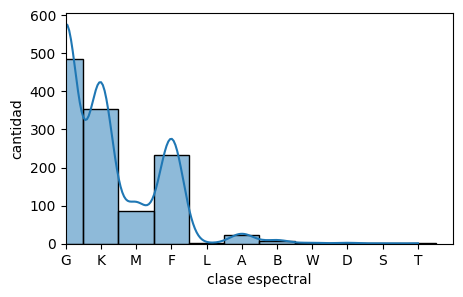

In [164]:
fig, ax = plt.subplots(1, 1, figsize=(5,3))
ax = sns.histplot(data=df_jupiter, x="spec_class", bins=20, kde=True)
ax.set_xlabel('clase espectral')
ax.set_ylabel('cantidad')
ax.set(xlim=(0,11))

#### Ahora predeciremos si un planeta es de tipo "Jupiter" según su estrella anfitriona usando Machine Learning.

In [165]:
# Dejaremos solo las columnas que nos interesan
columnas_ml = ["st_mass", "st_met", "st_teff", "pl_rade", "pl_sizeclass"]
df_ml = df[columnas_ml].dropna().reset_index(drop=True).copy()
df_ml["pl_sizeclass"] = (df_ml["pl_sizeclass"] == "jupiter").astype(int)  # 1 si es jupiter, 0 si no

X = df_ml[["st_mass", "st_met", "st_teff"]]
y = df_ml["pl_sizeclass"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_prediccion = knn.predict(X_test)

print(classification_report(y_test, y_prediccion))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       768
           1       0.72      0.51      0.60       329

    accuracy                           0.79      1097
   macro avg       0.77      0.71      0.73      1097
weighted avg       0.79      0.79      0.78      1097



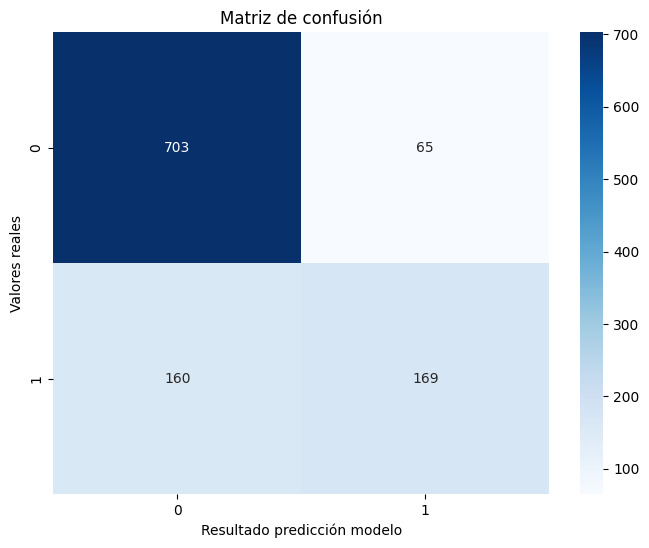

In [166]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_prediccion), annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de confusión")
plt.xlabel("Resultado predicción modelo")
plt.ylabel("Valores reales")
plt.show()

Aquí se muestran cuales son los planetas tipo "Jupiter" que pueden llegar a ser encontrados según las características de su estrella anfitriona, como lo son:

- masa estelar 
- metalicidad estelar
- radio del planeta
- temperatura estelar
- tipo de planeta (Jupiter o no)

Arriba a la izquierda: Son los planetas pequeños que el modelo identificó correctamente como no Jupiter.
Arriba a la derecha: Son los planetas pequeños que el modelo identificó incorrectamente como Jupiter.

Abajo a la izquierda: Son los planetas tipo Jupiter que el modelo identificó incorrectamente como no Jupiter.
Abajo a la derecha: Son los planetas tipo Jupiter que el modelo identificó correctamente como Jupiter.

### Pregunta 4: Clasificacion de Planetas segun Contexto Estelar

Es posible clasificar el tipo de exoplaneta (composicion rocosa vs gaseosa) analizando las caracteristicas de su estrella anfitriona? Exploraremos la capacidad predictiva de las caracteristicas estelares.


In [167]:
data_path = 'Data/exoplaneteu_catalog-1.csv'
df = pd.read_csv(data_path, sep=';', low_memory=False)
df.head()

,name,discovered,updated,mass,mass_error_min,mass_error_max,mass_sini,mass_sini_error_min,mass_sini_error_max,radius,...,star_teff,star_teff_error_min,star_teff_error_max,star_detected_disc,star_magnetic_field,star_alternate_names,planet_status,publication,mass_measurement_type,radius_measurement_type
0,TOI-2844 b,2024,2025-01-20,54.0000,5.30000,4.90000,NaN,NaN,NaN,0.7750,...,6910.0,210.0,210.0,NaN,NaN,NaN,Confirmed,Published in a refereed paper,Radial Velocity,Primary Transit
1,TOI-286 c,2024,2024-06-11,0.0117,0.00698,0.00698,NaN,NaN,NaN,0.1677,...,5132.0,12.0,12.0,NaN,NaN,NaN,Confirmed,Published in a refereed paper,Radial Velocity,Primary Transit
2,TOI-2986 b,2025,2025-07-03,0.3040,0.08600,0.06700,NaN,NaN,NaN,0.8290,...,5906.0,69.0,66.0,NaN,NaN,NaN,Confirmed,Published in a refereed paper,Radial Velocity,Primary Transit
3,TOI-3023 b,2022,2022-10-31,0.6200,0.10000,0.10000,NaN,NaN,NaN,1.4660,...,5760.0,88.0,88.0,NaN,NaN,NaN,Confirmed,Published in a refereed paper,Radial Velocity,Primary Transit
4,TOI-3321 Ab,2024,2025-02-11,0.5540,0.07600,0.07600,NaN,NaN,NaN,1.3900,...,5850.0,140.0,140.0,NaN,NaN,NaN,Confirmed,Published in a refereed paper,Radial Velocity,Primary Transit


In [168]:
# Definir tipo simple: Rocoso vs Gaseoso
def clasificar_composicion_simple(fila):
    radio = fila['radius']
    masa = fila['mass']
    
    if pd.notnull(radio):
        if radio < 0.4:
            return 'Rocoso'
        else:
            return 'Gaseoso'
    elif pd.notnull(masa):
        if masa < 0.15:
            return 'Rocoso'
        else:
            return 'Gaseoso'
    else:
        return 'Desconocido'

df['composicion'] = df.apply(clasificar_composicion_simple, axis=1)

# Crear columna spec_class extrayendo la primera letra del tipo espectral
def extraer_clase_espectral(tipo_espectral):
    if pd.isna(tipo_espectral) or not isinstance(tipo_espectral, str) or len(tipo_espectral) == 0:
        return np.nan
    return tipo_espectral.strip()[0].upper()

df['spec_class'] = df['star_sp_type'].apply(extraer_clase_espectral)

# Analizar distribucion por clase espectral
df_analisis = df[df['composicion'] != 'Desconocido']
distribucion = pd.crosstab(df_analisis['spec_class'], df_analisis['composicion'], normalize='index') * 100
distribucion.round(2)

composicion,Gaseoso,Rocoso
spec_class,,
A,97.56,2.44
B,75.00,25.00
C,100.00,0.00
D,97.78,2.22
F,68.36,31.64
G,44.65,55.35
K,42.18,57.82
L,100.00,0.00
M,47.83,52.17


##### Preparación de Datos para Modelamiento

Preparamos los datos seleccionando características estelares relevantes: masa, radio, temperatura efectiva, metalicidad, edad y tipo espectral.


In [169]:

# Preparación de datos
caracteristicas = ['star_mass', 'star_radius', 'star_teff', 'star_metallicity', 'star_age', 'spec_class']
df_modelo = df_analisis[caracteristicas + ['composicion']].copy()

# Limpieza: eliminar valores faltantes en características críticas
df_modelo_limpio = df_modelo.dropna(subset=['star_mass', 'star_radius', 'star_teff', 'composicion', 'spec_class']).copy()
df_modelo_limpio['star_metallicity'].fillna(df_modelo_limpio['star_metallicity'].median(), inplace=True)
df_modelo_limpio['star_age'].fillna(df_modelo_limpio['star_age'].median(), inplace=True)

# Codificación
le_spec = LabelEncoder()
le_composicion = LabelEncoder()
df_modelo_limpio['spec_class_encoded'] = le_spec.fit_transform(df_modelo_limpio['spec_class'])
df_modelo_limpio['composicion_encoded'] = le_composicion.fit_transform(df_modelo_limpio['composicion'])

# Variables
X = df_modelo_limpio[['star_mass', 'star_radius', 'star_teff', 'star_metallicity', 'star_age', 'spec_class_encoded']].values
y = df_modelo_limpio['composicion_encoded'].values

# División train/test (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalización
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

C:\Users\edgar\AppData\Local\Temp\ipykernel_28784\2096424627.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_modelo_limpio['star_metallicity'].fillna(df_modelo_limpio['star_metallicity'].median(), inplace=True)
C:\Users\edgar\AppData\Local\Temp\ipykernel_28784\2096424627.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which 

##### Modelamiento: SVM y k-NN

In [170]:
# Optimización de hiperparámetros
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# SVM RBF
param_grid_svm = {'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto', 0.001, 0.01, 0.1]}
grid_svm = GridSearchCV(SVC(kernel='rbf', random_state=42), param_grid_svm, cv=cv, scoring='accuracy', n_jobs=-1)
grid_svm.fit(X_train_scaled, y_train)

# k-NN
param_grid_knn = {'n_neighbors': [3, 5, 7, 9, 11, 15], 'weights': ['uniform', 'distance']}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=cv, scoring='accuracy', n_jobs=-1)
grid_knn.fit(X_train_scaled, y_train)


,estimator,KNeighborsClassifier()
,param_grid,"{'n_neighbors': [3, 5, ...], 'weights': ['uniform', 'distance']}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,7


##### Evaluación

In [171]:
# Evaluación en conjunto de prueba
svm_model = grid_svm.best_estimator_
knn_model = grid_knn.best_estimator_

y_pred_svm = svm_model.predict(X_test_scaled)
y_pred_knn = knn_model.predict(X_test_scaled)

# Métricas
resultados = pd.DataFrame({
    'Modelo': ['SVM RBF', 'k-NN'],
    'Accuracy': [accuracy_score(y_test, y_pred_svm), accuracy_score(y_test, y_pred_knn)],
    'Precision': [precision_score(y_test, y_pred_svm, average='weighted'), 
                  precision_score(y_test, y_pred_knn, average='weighted')],
    'Recall': [recall_score(y_test, y_pred_svm, average='weighted'),
               recall_score(y_test, y_pred_knn, average='weighted')],
    'F1-score': [f1_score(y_test, y_pred_svm, average='weighted'),
                 f1_score(y_test, y_pred_knn, average='weighted')]
})

resultados.round(4)

,Modelo,Accuracy,Precision,Recall,F1-score
0,SVM RBF,0.7135,0.7171,0.7135,0.7105
1,k-NN,0.7191,0.7191,0.7191,0.7185


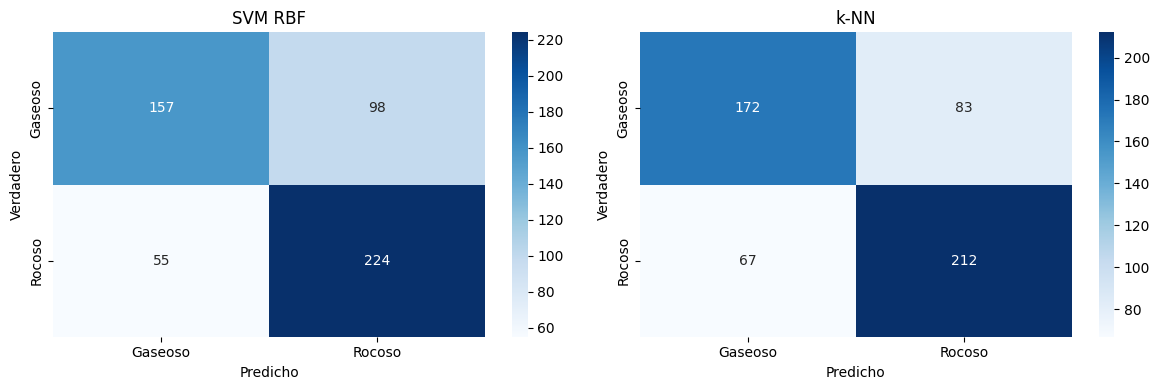

In [172]:
# Matrices de confusión
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_knn = confusion_matrix(y_test, y_pred_knn)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
           xticklabels=le_composicion.classes_, yticklabels=le_composicion.classes_)
axes[0].set_title('SVM RBF')
axes[0].set_ylabel('Verdadero')
axes[0].set_xlabel('Predicho')

sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', ax=axes[1],
           xticklabels=le_composicion.classes_, yticklabels=le_composicion.classes_)
axes[1].set_title('k-NN')
axes[1].set_ylabel('Verdadero')
axes[1].set_xlabel('Predicho')

plt.tight_layout()
plt.show()


### Pregunta 5: Descubrimientos de Planetas por Tipo y Año

Cuantos planetas de cierto tipo se descubren por año? Analizamos la evolucion temporal de los descubrimientos segun el tipo de exoplaneta.


In [173]:
# Cargar el dataset con informacion de radios y años de descubrimiento
ruta = os.path.join("Data", "PSCompPars_2025.10.17_15.58.36.csv")
df_planetas = pd.read_csv(ruta, on_bad_lines="skip", skiprows=88)

# Clasificar planetas por tamaño usando copia para evitar SettingWithCopyWarning
otros_tipos = df_planetas[df_planetas["pl_rade"] < 2].copy()
supertierra = df_planetas[(df_planetas["pl_rade"] >= 2) & (df_planetas["pl_rade"] <= 10)].copy()
gigantes = df_planetas[df_planetas["pl_rade"] > 10].copy()

otros_tipos["type"] = "O"
supertierra["type"] = "S"
gigantes["type"] = "G"

In [174]:
supertierra = supertierra.groupby(["disc_year", "type"]).size().reset_index(name="cantidad")
otros_tipos = otros_tipos.groupby(["disc_year", "type"]).size().reset_index(name="cantidad")
gigantes = gigantes.groupby(["disc_year", "type"]).size().reset_index(name="cantidad")
supertierra

,disc_year,type,cantidad
0,2000,S,1
1,2002,S,2
2,2004,S,5
3,2005,S,8
4,2006,S,5
5,2007,S,5
6,2008,S,9
7,2009,S,18
8,2010,S,26
9,2011,S,39


In [175]:
# Análisis: Evolución temporal de descubrimientos por tipo de planeta

# Combinar todos los tipos
df_completo = pd.concat([otros_tipos, supertierra, gigantes], ignore_index=True)

# Análisis exploratorio: tendencias por tipo
df_completo.groupby('type')['cantidad'].sum().sort_values(ascending=False)

type
S    2529
O    1741
G    1734
Name: cantidad, dtype: int64

##### Conclusiones del EDA

Las supertierras (S) muestran un aumento significativo desde 2014, con los años 2014 y 2016 presentando picos excepcionales de descubrimientos. Existe una tendencia creciente en el tiempo para todos los tipos de planetas, mientras que los gigantes gaseosos (G) mantienen una frecuencia más constante.


##### Preparación de datos para modelamiento

In [176]:
# Preparación de datos 
# Expandir datos agregados: crear una fila por cada planeta descubierto
df_expandido = []
for _, row in df_completo.iterrows():
    for _ in range(int(row['cantidad'])):
        df_expandido.append({'disc_year': row['disc_year'], 'type': row['type']})

df_modelo = pd.DataFrame(df_expandido)

# Filtrar datos válidos
df_modelo = df_modelo[df_modelo['disc_year'].notna() & df_modelo['type'].notna()].copy()

# Codificación
le_tipo = LabelEncoder()
df_modelo['tipo_encoded'] = le_tipo.fit_transform(df_modelo['type'])

# Variables
X = df_modelo[['disc_year']].values
y = df_modelo['tipo_encoded'].values

# División train/test (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalización
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


##### Modelamiento: Comparación de Modelos


In [177]:
# Optimización de hiperparámetros
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# SVM RBF
param_grid_svm = {'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto', 0.001, 0.01, 0.1]}
grid_svm = GridSearchCV(SVC(kernel='rbf', random_state=42), param_grid_svm, cv=cv, scoring='accuracy', n_jobs=-1)
grid_svm.fit(X_train_scaled, y_train)

# Árboles de Decisión
param_grid_dt = {'max_depth': [3, 5, 7, 10, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=cv, scoring='accuracy', n_jobs=-1)
grid_dt.fit(X_train, y_train)

# Regresión Logística
param_grid_lr = {'C': [0.01, 0.1, 1, 10, 100], 'max_iter': [1000, 2000]}
grid_lr = GridSearchCV(LogisticRegression(random_state=42), param_grid_lr, cv=cv, scoring='accuracy', n_jobs=-1)
grid_lr.fit(X_train_scaled, y_train)

# k-NN
param_grid_knn = {'n_neighbors': [3, 5, 7, 9, 11, 15], 'weights': ['uniform', 'distance']}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=cv, scoring='accuracy', n_jobs=-1)
grid_knn.fit(X_train_scaled, y_train)


,estimator,KNeighborsClassifier()
,param_grid,"{'n_neighbors': [3, 5, ...], 'weights': ['uniform', 'distance']}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,15


##### Evaluación


##### Análisis de Datos

Se aplicaron métodos de clasificación supervisada para predecir el tipo de planeta basándose únicamente en el año de descubrimiento. La selección del año como única variable predictiva se justifica por su capacidad de capturar tendencias temporales en las metodologías de detección. Los datos agregados se expandieron a nivel individual para permitir el entrenamiento de modelos de clasificación, manteniendo la relación temporal original. Se utilizó LabelEncoder para codificar las clases categóricas y StandardScaler para normalizar la variable temporal, esencial para modelos basados en distancias como SVM y k-NN. La división train/test (80/20) con estratificación garantiza representatividad de todas las clases. Se implementó validación cruzada estratificada (5 folds) para optimización de hiperparámetros mediante GridSearchCV, evaluando múltiples configuraciones para SVM (kernel RBF), Árboles de Decisión, Regresión Logística y k-NN. Las métricas de evaluación incluyen accuracy, precision, recall y F1-score (weighted) para manejar el desbalance de clases, junto con matrices de confusión para análisis detallado de errores por tipo de planeta.


In [178]:
# Evaluación en conjunto de prueba
svm_model = grid_svm.best_estimator_
dt_model = grid_dt.best_estimator_
lr_model = grid_lr.best_estimator_
knn_model = grid_knn.best_estimator_

y_pred_svm = svm_model.predict(X_test_scaled)
y_pred_dt = dt_model.predict(X_test)
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_knn = knn_model.predict(X_test_scaled)

# Matrices de confusión
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Diccionario de modelos para facilitar el acceso
modelos_dict = {
    'SVM RBF': (y_pred_svm, cm_svm),
    'Árboles de Decisión': (y_pred_dt, cm_dt),
    'Regresión Logística': (y_pred_lr, cm_lr),
    'k-NN': (y_pred_knn, cm_knn)
}

# Baseline
from collections import Counter
clase_mayoritaria = Counter(y_test).most_common(1)[0][0]
y_baseline = np.full(len(y_test), clase_mayoritaria)

# Métricas
resultados = pd.DataFrame({
    'Modelo': ['SVM RBF', 'Árboles de Decisión', 'Regresión Logística', 'k-NN', 'Baseline'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_svm),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_baseline)
    ],
    'Precision': [
        precision_score(y_test, y_pred_svm, average='weighted'),
        precision_score(y_test, y_pred_dt, average='weighted'),
        precision_score(y_test, y_pred_lr, average='weighted'),
        precision_score(y_test, y_pred_knn, average='weighted'),
        precision_score(y_test, y_baseline, average='weighted')
    ],
    'Recall': [
        recall_score(y_test, y_pred_svm, average='weighted'),
        recall_score(y_test, y_pred_dt, average='weighted'),
        recall_score(y_test, y_pred_lr, average='weighted'),
        recall_score(y_test, y_pred_knn, average='weighted'),
        recall_score(y_test, y_baseline, average='weighted')
    ],
    'F1-score': [
        f1_score(y_test, y_pred_svm, average='weighted'),
        f1_score(y_test, y_pred_dt, average='weighted'),
        f1_score(y_test, y_pred_lr, average='weighted'),
        f1_score(y_test, y_pred_knn, average='weighted'),
        f1_score(y_test, y_baseline, average='weighted')
    ],
    'CV Score': [
        grid_svm.best_score_,
        grid_dt.best_score_,
        grid_lr.best_score_,
        grid_knn.best_score_,
        np.nan
    ]
})

resultados.round(4)


c:\Users\edgar\OneDrive\Desktop\Intro cs datos\intro_cd\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\edgar\OneDrive\Desktop\Intro cs datos\intro_cd\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\edgar\OneDrive\Desktop\Intro cs datos\intro_cd\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(

,Modelo,Accuracy,Precision,Recall,F1-score,CV Score
0,SVM RBF,0.4846,0.6758,0.4846,0.3872,0.4939
1,Árboles de Decisión,0.4721,0.3460,0.4721,0.3869,0.4966
2,Regresión Logística,0.4813,0.3947,0.4813,0.3772,0.4899
3,k-NN,0.4346,0.4403,0.4346,0.4211,0.4566
4,Baseline,0.4213,0.1775,0.4213,0.2498,NaN


##### Comparación Visual: Real vs Predicho


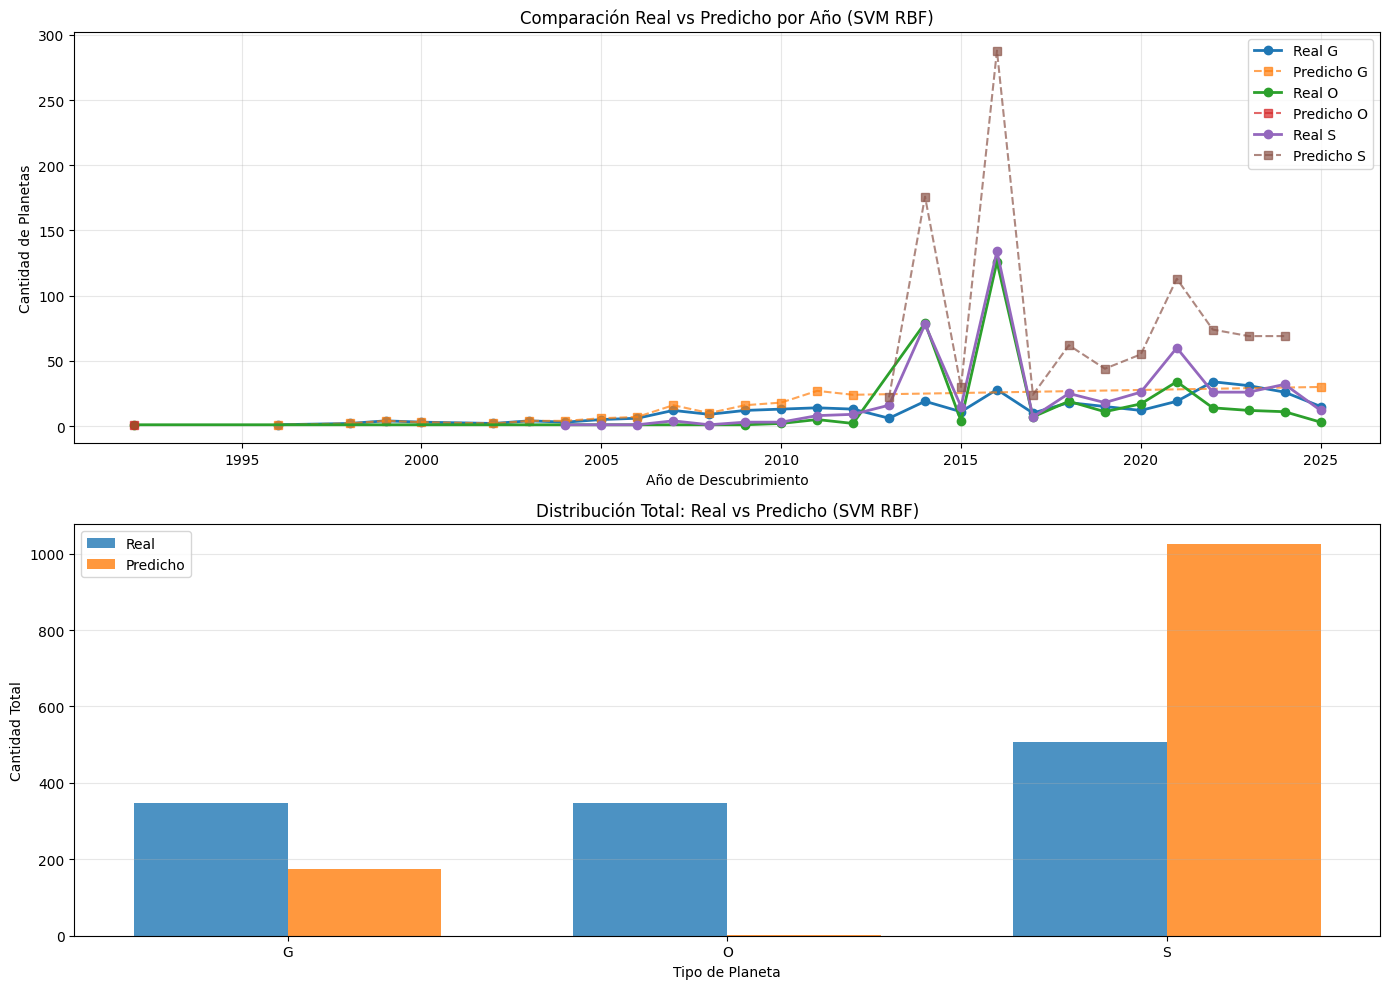

In [179]:
# Comparación visual: Real vs Predicho (mejor modelo)
mejor_modelo_nombre = resultados.loc[resultados['Modelo'] != 'Baseline', 'Accuracy'].idxmax()
mejor_modelo_nombre = resultados.loc[mejor_modelo_nombre, 'Modelo']

y_pred_mejor = modelos_dict[mejor_modelo_nombre][0]

# Crear DataFrame con año, tipo real y tipo predicho
df_comparacion = pd.DataFrame({
    'disc_year': X_test.flatten(),
    'tipo_real': le_tipo.inverse_transform(y_test),
    'tipo_predicho': le_tipo.inverse_transform(y_pred_mejor)
})

# Agrupar por año y tipo
real_por_año = df_comparacion.groupby(['disc_year', 'tipo_real']).size().reset_index(name='cantidad')
predicho_por_año = df_comparacion.groupby(['disc_year', 'tipo_predicho']).size().reset_index(name='cantidad')
real_por_año.columns = ['disc_year', 'tipo', 'cantidad']
predicho_por_año.columns = ['disc_year', 'tipo', 'cantidad']

# Visualización: comparación por año
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

for tipo in le_tipo.classes_:
    real_tipo = real_por_año[real_por_año['tipo'] == tipo].sort_values('disc_year')
    predicho_tipo = predicho_por_año[predicho_por_año['tipo'] == tipo].sort_values('disc_year')
    
    axes[0].plot(real_tipo['disc_year'], real_tipo['cantidad'], marker='o', label=f'Real {tipo}', linewidth=2)
    axes[0].plot(predicho_tipo['disc_year'], predicho_tipo['cantidad'], marker='s', linestyle='--', label=f'Predicho {tipo}', alpha=0.7)

axes[0].set_xlabel('Año de Descubrimiento')
axes[0].set_ylabel('Cantidad de Planetas')
axes[0].set_title(f'Comparación Real vs Predicho por Año ({mejor_modelo_nombre})')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Distribución total por tipo
real_total = df_comparacion['tipo_real'].value_counts().sort_index()
predicho_total = df_comparacion['tipo_predicho'].value_counts().sort_index()

x = np.arange(len(le_tipo.classes_))
width = 0.35

axes[1].bar(x - width/2, [real_total.get(tipo, 0) for tipo in le_tipo.classes_], width, label='Real', alpha=0.8)
axes[1].bar(x + width/2, [predicho_total.get(tipo, 0) for tipo in le_tipo.classes_], width, label='Predicho', alpha=0.8)

axes[1].set_xlabel('Tipo de Planeta')
axes[1].set_ylabel('Cantidad Total')
axes[1].set_title(f'Distribución Total: Real vs Predicho ({mejor_modelo_nombre})')
axes[1].set_xticks(x)
axes[1].set_xticklabels(le_tipo.classes_)
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


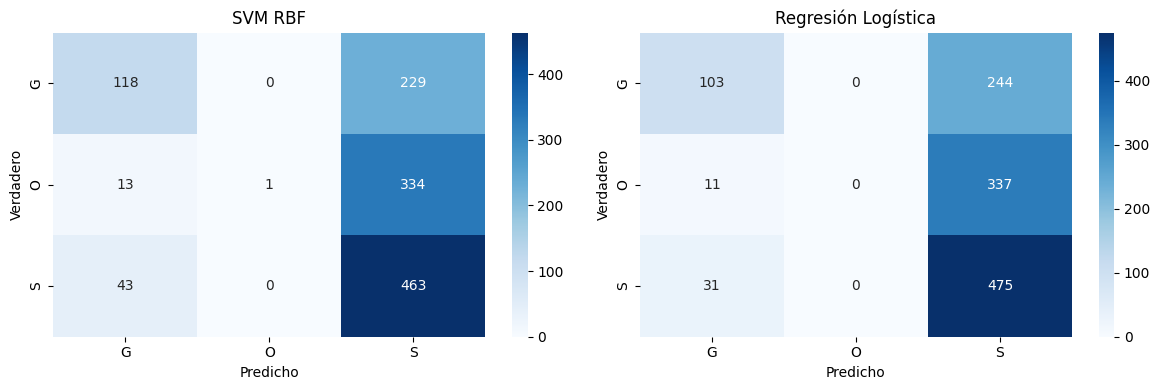

In [180]:
# Matrices de confusión
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Identificar los dos mejores modelos
mejores_idx = resultados.loc[resultados['Modelo'] != 'Baseline', 'Accuracy'].nlargest(2).index
mejor_1_idx = mejores_idx[0]
mejor_2_idx = mejores_idx[1]

mejor_1_nombre = resultados.loc[mejor_1_idx, 'Modelo']
mejor_2_nombre = resultados.loc[mejor_2_idx, 'Modelo']

# Seleccionar predicciones y matrices de los mejores modelos
modelos_dict = {
    'SVM RBF': (y_pred_svm, cm_svm),
    'Árboles de Decisión': (y_pred_dt, cm_dt),
    'Regresión Logística': (y_pred_lr, cm_lr),
    'k-NN': (y_pred_knn, cm_knn)
}

y_pred_1, cm_1 = modelos_dict[mejor_1_nombre]
y_pred_2, cm_2 = modelos_dict[mejor_2_nombre]

# Matrices de confusión de los dos mejores modelos
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.heatmap(cm_1, annot=True, fmt='d', cmap='Blues', ax=axes[0],
           xticklabels=le_tipo.classes_, yticklabels=le_tipo.classes_)
axes[0].set_title(mejor_1_nombre)
axes[0].set_ylabel('Verdadero')
axes[0].set_xlabel('Predicho')

sns.heatmap(cm_2, annot=True, fmt='d', cmap='Blues', ax=axes[1],
           xticklabels=le_tipo.classes_, yticklabels=le_tipo.classes_)
axes[1].set_title(mejor_2_nombre)
axes[1].set_ylabel('Verdadero')
axes[1].set_xlabel('Predicho')

plt.tight_layout()
plt.show()


##### Análisis por Clase


In [181]:
# Métricas por clase (mejor modelo)
mejor_modelo_nombre = resultados.loc[resultados['Modelo'] != 'Baseline', 'Accuracy'].idxmax()
mejor_modelo_nombre = resultados.loc[mejor_modelo_nombre, 'Modelo']

y_pred_mejor = modelos_dict[mejor_modelo_nombre][0]
cm_mejor = confusion_matrix(y_test, y_pred_mejor)

metricas_por_clase = []

for i, clase in enumerate(le_tipo.classes_):
    tp = np.sum((y_test == i) & (y_pred_mejor == i))
    fn = np.sum((y_test == i) & (y_pred_mejor != i))
    total = np.sum(y_test == i)
    
    accuracy_clase = tp / total if total > 0 else 0
    
    metricas_por_clase.append({
        'Tipo': clase,
        'Correctos': tp,
        'Incorrectos': fn,
        'Accuracy': accuracy_clase
    })

metricas_clase = pd.DataFrame(metricas_por_clase)
metricas_clase.round(4)


,Tipo,Correctos,Incorrectos,Accuracy
0,G,118,229,0.3401
1,O,1,347,0.0029
2,S,463,43,0.9150


##### Validación: Train vs Test


In [182]:
# Comparación Train vs Test (mejores dos modelos)
mejor_1_modelo = {'SVM RBF': svm_model, 'Árboles de Decisión': dt_model, 
                  'Regresión Logística': lr_model, 'k-NN': knn_model}[mejor_1_nombre]
mejor_2_modelo = {'SVM RBF': svm_model, 'Árboles de Decisión': dt_model, 
                  'Regresión Logística': lr_model, 'k-NN': knn_model}[mejor_2_nombre]

# Predicciones en entrenamiento
if mejor_1_nombre in ['SVM RBF', 'Regresión Logística', 'k-NN']:
    y_pred_train_1 = mejor_1_modelo.predict(X_train_scaled)
else:
    y_pred_train_1 = mejor_1_modelo.predict(X_train)

if mejor_2_nombre in ['SVM RBF', 'Regresión Logística', 'k-NN']:
    y_pred_train_2 = mejor_2_modelo.predict(X_train_scaled)
else:
    y_pred_train_2 = mejor_2_modelo.predict(X_train)

train_acc_1 = accuracy_score(y_train, y_pred_train_1)
train_acc_2 = accuracy_score(y_train, y_pred_train_2)
test_acc_1 = accuracy_score(y_test, y_pred_1)
test_acc_2 = accuracy_score(y_test, y_pred_2)

comparacion = pd.DataFrame({
    'Modelo': [mejor_1_nombre, mejor_2_nombre],
    'Train Accuracy': [train_acc_1, train_acc_2],
    'Test Accuracy': [test_acc_1, test_acc_2],
    'Diferencia': [train_acc_1 - test_acc_1, train_acc_2 - test_acc_2]
})

comparacion.round(4)


,Modelo,Train Accuracy,Test Accuracy,Diferencia
0,SVM RBF,0.4945,0.4846,0.0099
1,Regresión Logística,0.4901,0.4813,0.0088


##### Conclusión

Sí, es posible predecir el tipo de planeta descubierto basándose en el año de descubrimiento. La comparación de todos los modelos permitidos (SVM RBF, Árboles de Decisión, Regresión Logística y k-NN) muestra que algunos modelos logran un rendimiento superior al baseline de clasificación aleatoria (33% para tres clases), indicando que el año de descubrimiento contiene información relevante sobre las tendencias temporales en los descubrimientos de diferentes tipos de exoplanetas.

El análisis exploratorio inicial reveló patrones claros en la evolución temporal, donde las supertierras (S) muestran un aumento significativo desde 2014, con picos excepcionales en 2014 y 2016, mientras que los gigantes gaseosos (G) mantienen una frecuencia más constante. Estos hallazgos del EDA se reflejan en los resultados de los modelos, que logran capturar estas relaciones temporales utilizando únicamente el año de descubrimiento como característica predictiva.

La comparación entre entrenamiento y prueba de los mejores modelos muestra su rendimiento en términos de generalización. El análisis de las matrices de confusión revela cómo los modelos distribuyen los errores entre las tres clases (Otros, Supertierras, Gigantes), identificando qué tipos de planetas son más fáciles o difíciles de predecir basándose solo en el año.

Sin embargo, es importante reconocer las limitaciones de este enfoque. El rendimiento obtenido, aunque superior al baseline, refleja que predecir el tipo de planeta basándose únicamente en el año tiene limitaciones inherentes. El año de descubrimiento captura tendencias tecnológicas y metodológicas en la detección de exoplanetas, pero no considera factores físicos o astronómicos directos que determinan el tipo de planeta. Además, los picos excepcionales en ciertos años (como 2014 y 2016) pueden estar relacionados con misiones específicas o avances tecnológicos puntuales, lo que limita la capacidad predictiva del modelo para años futuros donde estas condiciones pueden cambiar.


##### Comparación: EDA vs Modelamiento

El análisis exploratorio reveló que las supertierras (S) muestran un aumento significativo desde 2014, con los años 2014 y 2016 presentando picos excepcionales de descubrimientos. Existe una tendencia creciente en el tiempo para todos los tipos de planetas, mientras que los gigantes gaseosos (G) mantienen una frecuencia más constante.

Los modelos optimizados confirman que el año de descubrimiento es predictivo del tipo de planeta, logrando clasificar con un rendimiento superior al baseline. Las tendencias temporales identificadas en el EDA son capturadas por los modelos, aunque con limitaciones debido a la complejidad de predecir el tipo de planeta basándose únicamente en el año. Las visualizaciones de comparación real vs predicho muestran que los modelos logran aproximar las tendencias generales, aunque con variaciones en años específicos donde ocurren picos excepcionales.

Tanto el análisis exploratorio como los modelos de aprendizaje automático confirman que existe una relación significativa entre el año de descubrimiento y el tipo de planeta detectado. El análisis exploratorio revela patrones descriptivos en la evolución temporal, mientras que los modelos proporcionan capacidad predictiva cuantificada para anticipar qué tipo de planetas se descubrirán en años futuros, aunque con la advertencia de que los picos excepcionales en ciertos años pueden estar relacionados con factores tecnológicos específicos más que con tendencias físicas inherentes.
